# `20190404a` dual smas

In [27]:
from pyUn0 import *

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert,convolve

### Exploring FFT and different spectral components

Data acquired


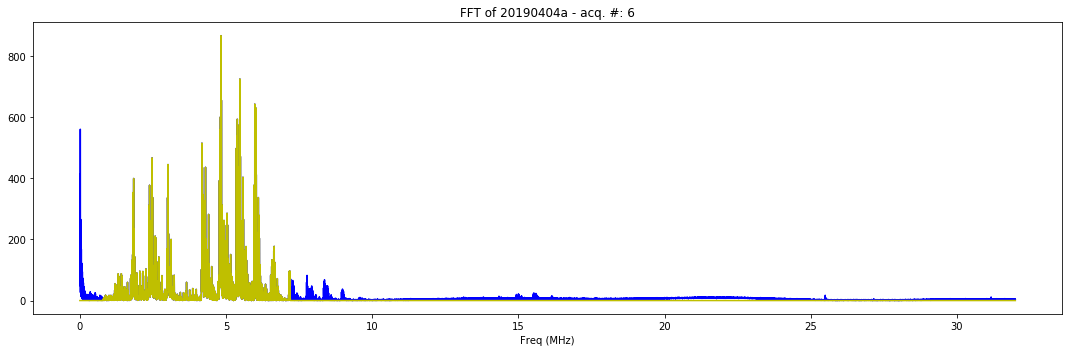

Data acquired


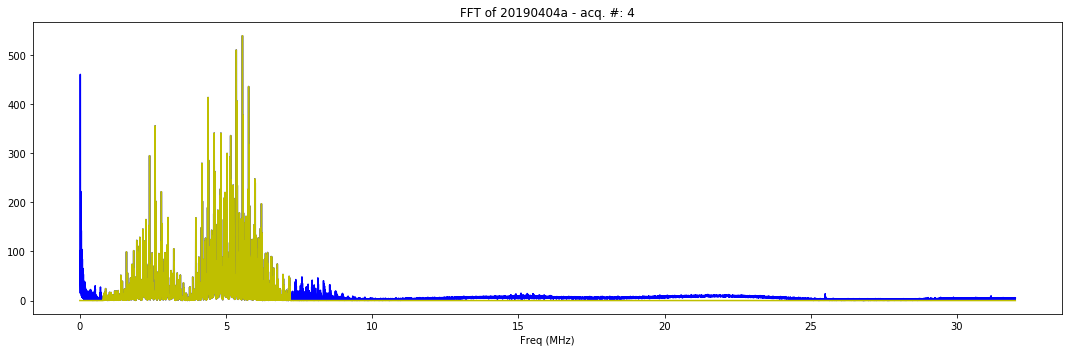

Data acquired


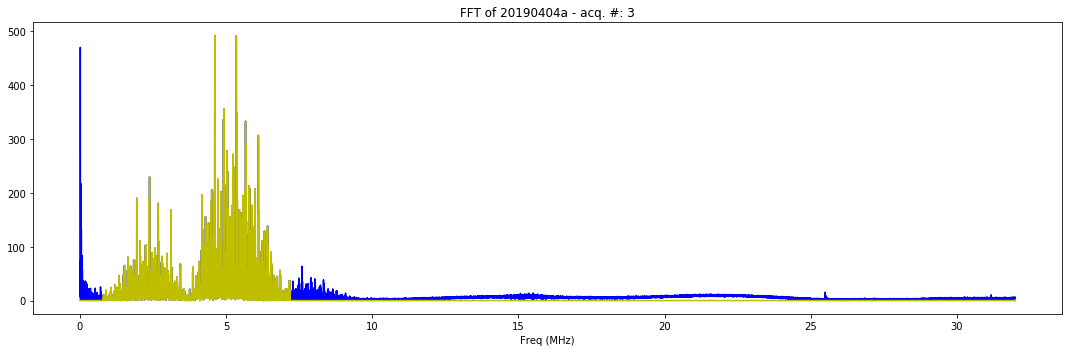

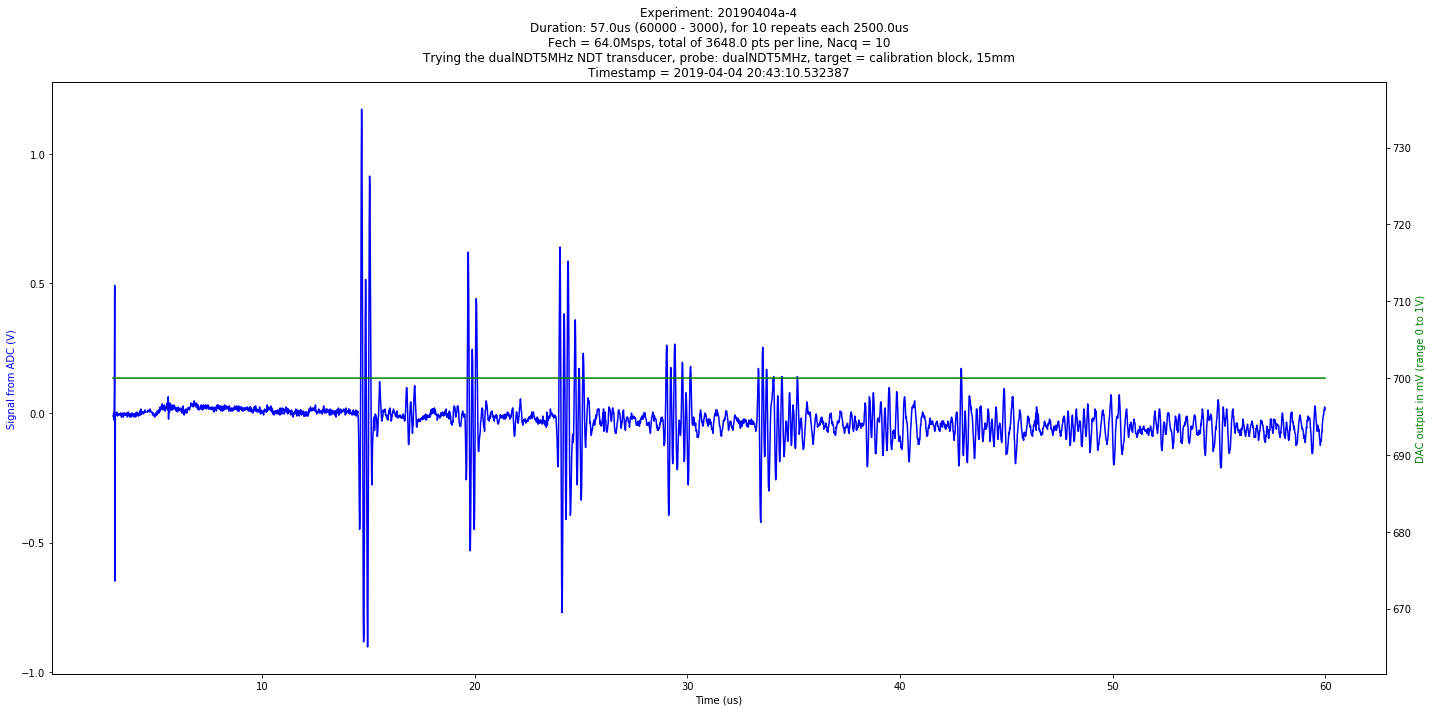

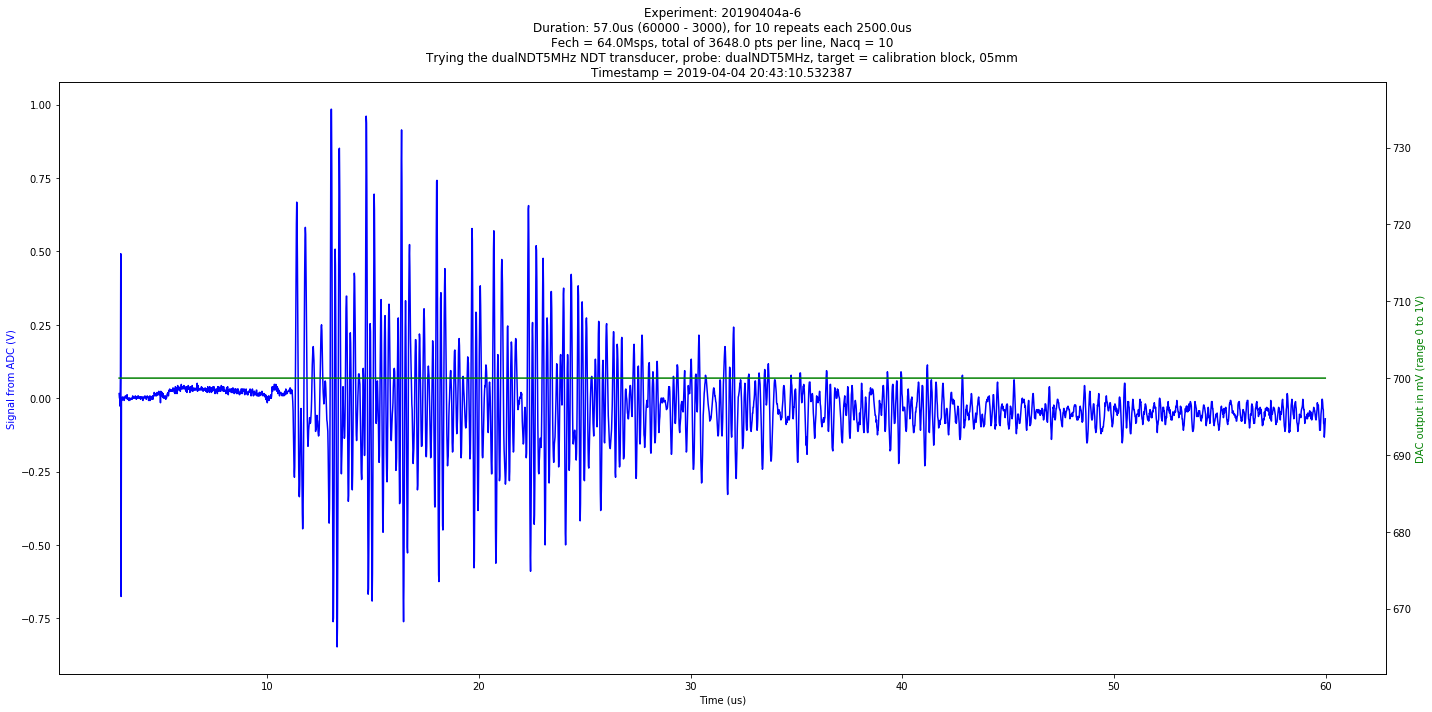

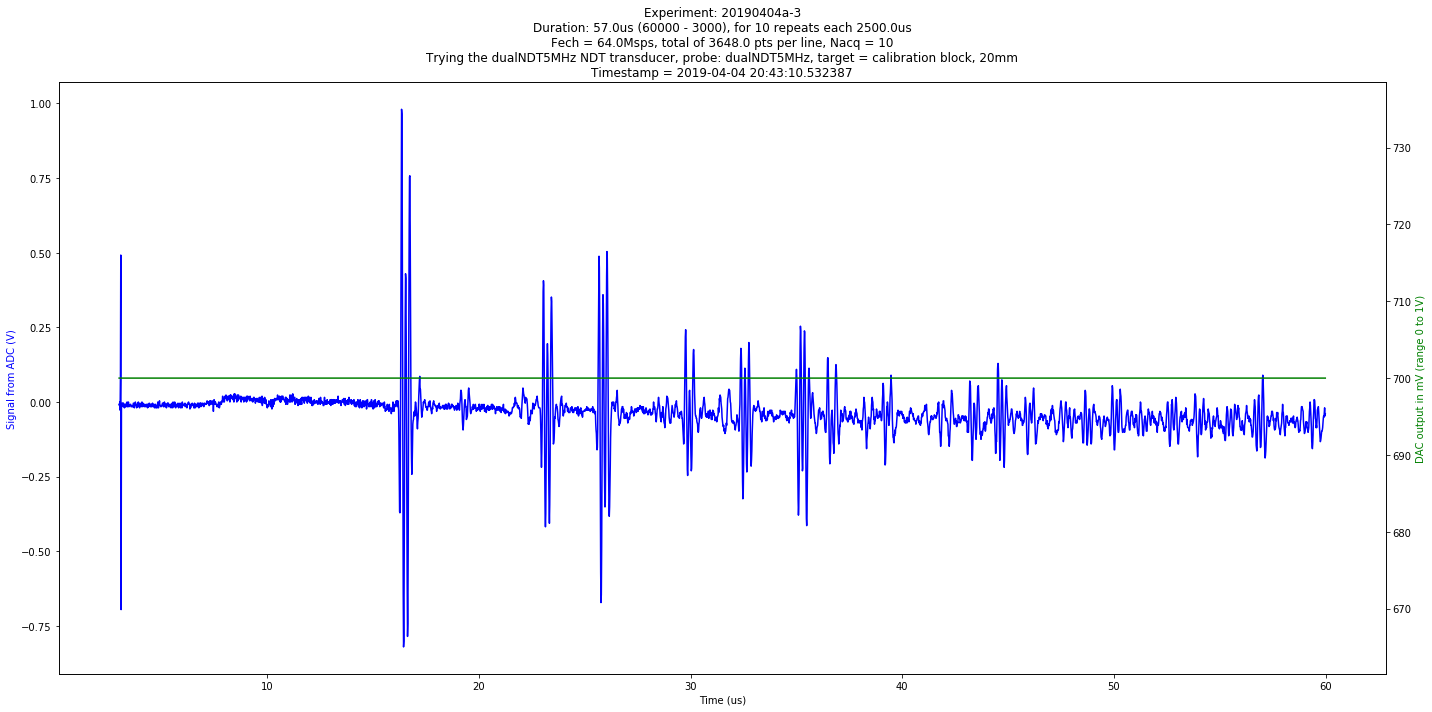

In [2]:
y = us_json()
y.fPiezo = 4
y.Bandwidth = 1.6
y.JSONprocessing("./data/20190404a-6.json")
y.create_fft() 

x = us_json()
x.fPiezo = 4
x.Bandwidth = 1.6
x.JSONprocessing("./data/20190404a-4.json") #
x.create_fft() 

z = us_json()
z.fPiezo = 4
z.Bandwidth = 1.6
z.JSONprocessing("./data/20190404a-3.json")
z.create_fft() 

x.mkImg()
y.mkImg()
z.mkImg()

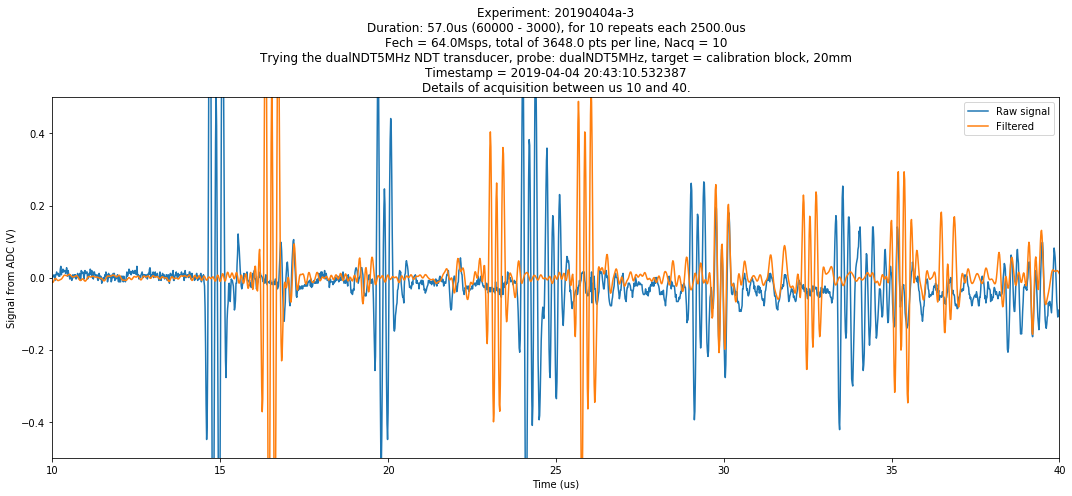

In [3]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT=10, 40
ax.plot(x.t,x.tmp,label="Raw signal")
ax.plot(z.t,z.filtered_signal,label = "Filtered")
ax.set_xlim(minT,maxT)
ax.set_ylim(-0.5, 0.5)
ax.legend()

DESC = z.create_title_text()+"\nDetails of acquisition between us "+str(minT)+" and "+ str(maxT)+"."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_"+str(minT)+"-"+str(maxT)+"_"+z.iD+"-"+str(z.N)+".jpg"
plt.savefig(file_name)
tag_image(file_name,"matty,dualNDT5MHz", z.experiment["id"], "graph", DESC)

plt.show()

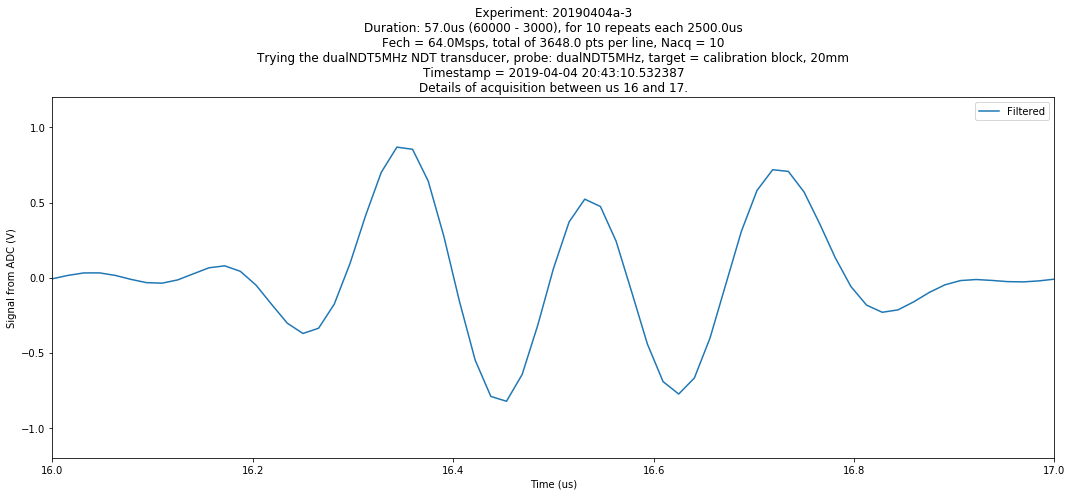

In [9]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT=16, 17
ax.plot(z.t,z.filtered_signal,label = "Filtered")
ax.set_xlim(minT,maxT)
ax.set_ylim(-1.2, 1.2)
ax.legend()

DESC = z.create_title_text()+"\nDetails of acquisition between us "+str(minT)+" and "+ str(maxT)+"."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_"+str(minT)+"-"+str(maxT)+"_"+z.iD+"-"+str(z.N)+".jpg"
plt.savefig(file_name)
tag_image(file_name,"matty,dualNDT5MHz", z.experiment["id"], "graph", DESC)

plt.show()

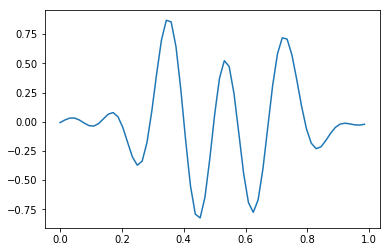

In [47]:
z.t[832],z.t[896]
PULSE = z.filtered_signal[832:896]
T = [x - 16.0 for x in z.t[832:896]]
plt.plot(T,PULSE)
plt.show()

(36543, 64, 36480)


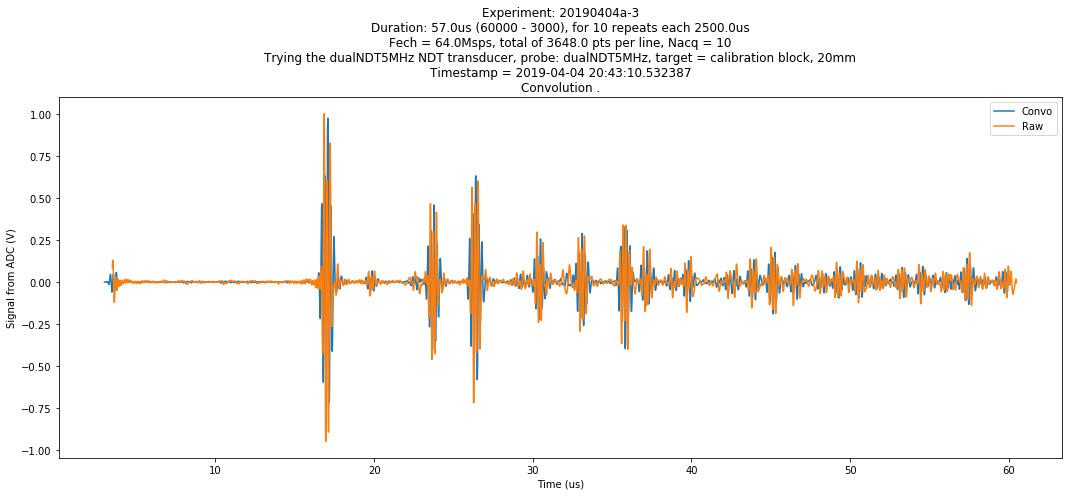

In [73]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
CONVO = convolve(z.filtered_signal,PULSE)
print(len(CONVO),len(PULSE),len(z.filtered_signal))
CONVO = CONVO / np.max(np.abs(CONVO))
SIGNAL = z.filtered_signal[0:3648] / np.max(np.abs(z.filtered_signal[0:3648]))
plt.plot(z.t[0:3648],CONVO[0:3648],label = "Convo")
plt.plot(z.t[0+32:3648+32],SIGNAL[0:3648],label = "Raw")
ax.legend()

DESC = z.create_title_text()+"\nConvolution ."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/enveloppes_"+z.iD+"-"+str(z.N)+".jpg"
plt.savefig(file_name)
tag_image(file_name,"matty,dualNDT5MHz", z.experiment["id"], "graph", DESC)

plt.show()



(36543, 64, 36480)


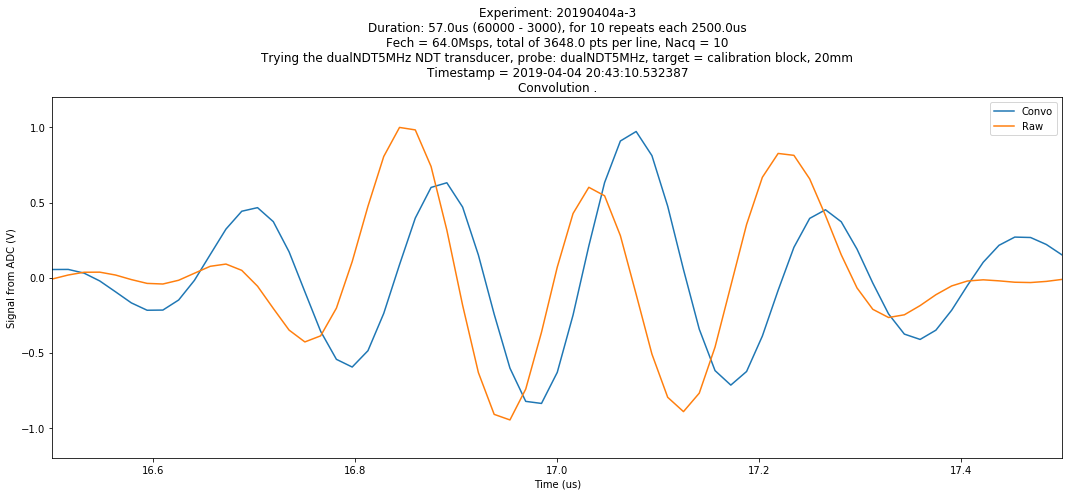

In [83]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)

minT,maxT=16.5, 17.5 
ax.set_xlim(minT,maxT)
ax.set_ylim(-1.2, 1.2)


CONVO = convolve(PULSE,z.filtered_signal)
print(len(CONVO),len(PULSE),len(z.filtered_signal))
CONVO = CONVO / np.max(np.abs(CONVO))
SIGNAL = z.filtered_signal[0:3648] / np.max(np.abs(z.filtered_signal[0:3648]))
plt.plot(z.t[0:3648],CONVO[0:3648],label = "Convo")
plt.plot(z.t[0+32:3648+32],SIGNAL[0:3648],label = "Raw")
ax.legend()

DESC = z.create_title_text()+"\nConvolution ."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/FilteredDetails_"+z.iD+"-"+str(z.N)+".jpg"
plt.savefig(file_name)
tag_image(file_name,"matty,dualNDT5MHz", z.experiment["id"], "graph", DESC)


plt.show()


(36543, 64, 36480)


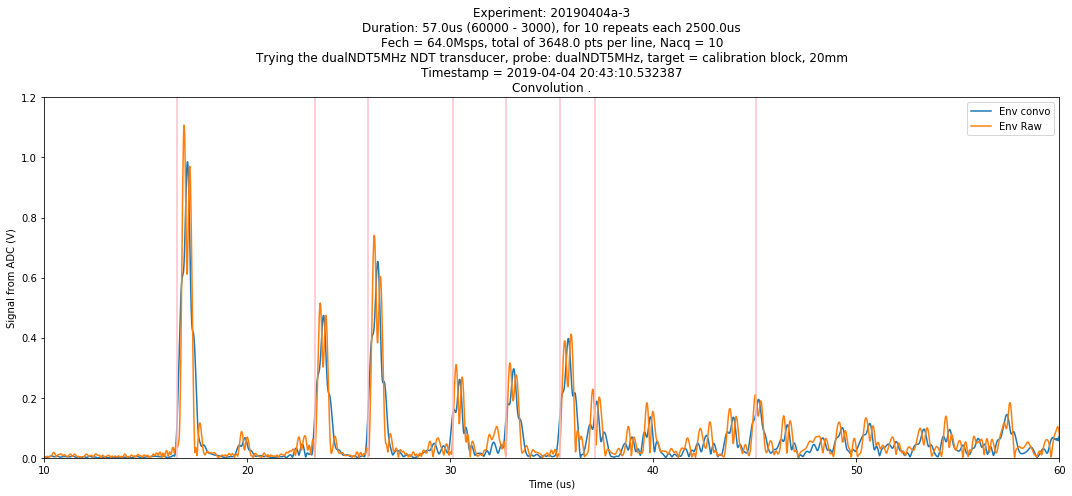

In [75]:
Timings = []
for k in range(3647):
    #print env_convo[k]
    if (env_convo[k] < 0.15) & (env_convo[k+1] >= 0.15):
        Timings.append(z.t[k])

        
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)

minT,maxT=10,60 
ax.set_xlim(minT,maxT)
ax.set_ylim(0, 1.2)


CONVO = convolve(z.filtered_signal,PULSE)
print(len(CONVO),len(PULSE),len(z.filtered_signal))
CONVO = CONVO / np.max(np.abs(CONVO))
SIGNAL = z.filtered_signal[0:3648] / np.max(np.abs(z.filtered_signal[0:3648]))

env_convo = np.abs(hilbert(CONVO[0:3648]))
env_filt = np.abs(hilbert(SIGNAL[0:3648]))

plt.plot(z.t[0:3648],env_convo[0:3648],label = "Env convo")
plt.plot(z.t[0+32:3648+32],env_filt[0:3648],label = "Env Raw")

for k in Timings:
    plt.axvline(x=k,color='pink')
ax.legend()

DESC = z.create_title_text()+"\nConvolution ."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/EnveloppeThickness_"+z.iD+"-"+str(z.N)+".jpg"
plt.savefig(file_name)
tag_image(file_name,"matty,dualNDT5MHz", z.experiment["id"], "graph", DESC)


plt.show()

(36543, 64, 36480)


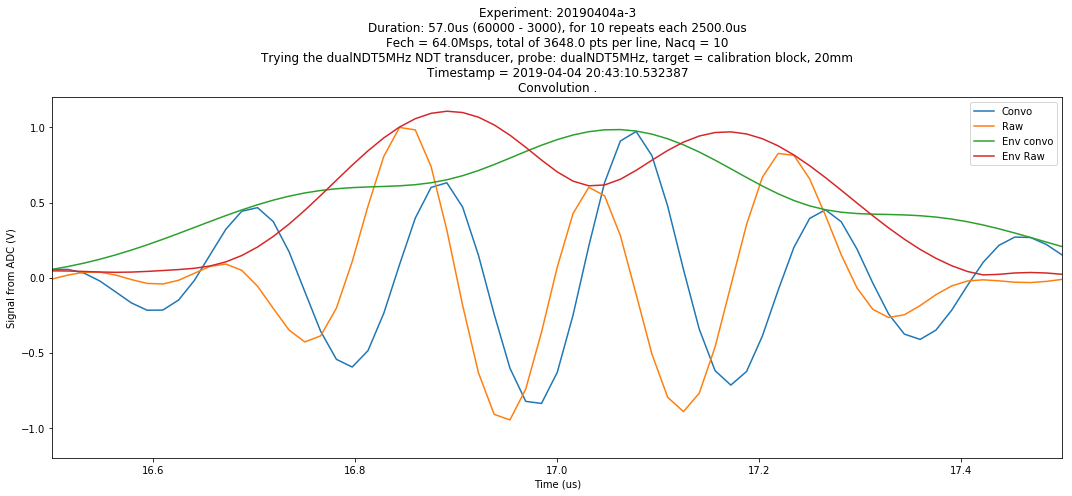

In [51]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)

minT,maxT=16.5, 17.5 
ax.set_xlim(minT,maxT)
ax.set_ylim(-1.2, 1.2)


CONVO = convolve(z.filtered_signal,PULSE)
print(len(CONVO),len(PULSE),len(z.filtered_signal))
CONVO = CONVO / np.max(np.abs(CONVO))
SIGNAL = z.filtered_signal[0:3648] / np.max(np.abs(z.filtered_signal[0:3648]))

env_convo = np.abs(hilbert(CONVO[0:3648]))
env_filt = np.abs(hilbert(SIGNAL[0:3648]))

plt.plot(z.t[0:3648],CONVO[0:3648],label = "Convo")
plt.plot(z.t[0+32:3648+32],SIGNAL[0:3648],label = "Raw")
plt.plot(z.t[0:3648],env_convo[0:3648],label = "Env convo")
plt.plot(z.t[0+32:3648+32],env_filt[0:3648],label = "Env Raw")

ax.legend()

DESC = z.create_title_text()+"\nConvolution ."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()
plt.show()

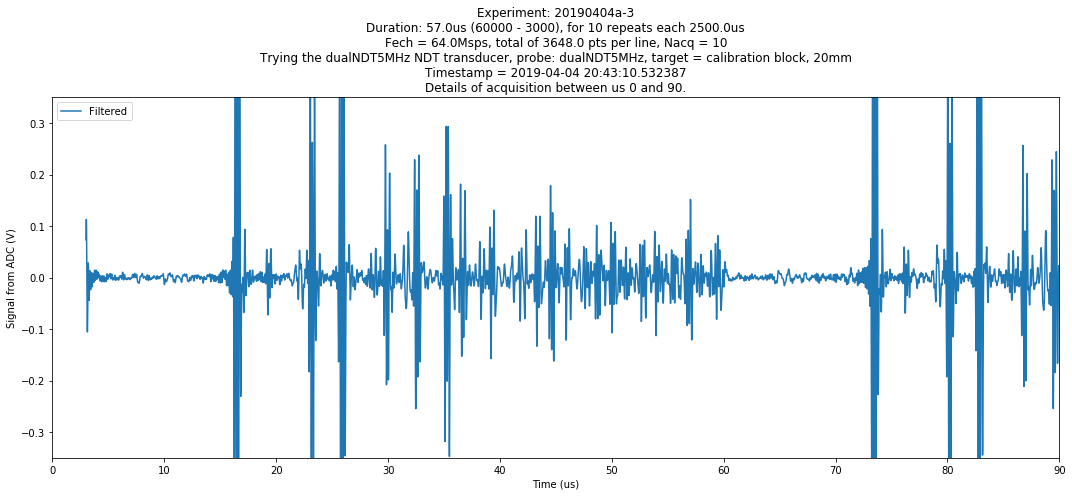

In [4]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT=0, 90
#ax.plot(y.t,y.tmp,label="Raw signal")
ax.plot(z.t,z.filtered_signal,label = "Filtered")
ax.set_xlim(minT,maxT)
ax.set_ylim(-0.35, 0.35)
ax.legend()

DESC = z.create_title_text()+"\nDetails of acquisition between us "+str(minT)+" and "+ str(maxT)+"."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_"+str(minT)+"-"+str(maxT)+"_"+z.iD+"-"+str(z.N)+".jpg"
plt.savefig(file_name)    
tag_image(file_name,"matty,dualNDT5MHz", x.experiment["id"], "signal", DESC)

plt.show()

## Using all lines

3648 10


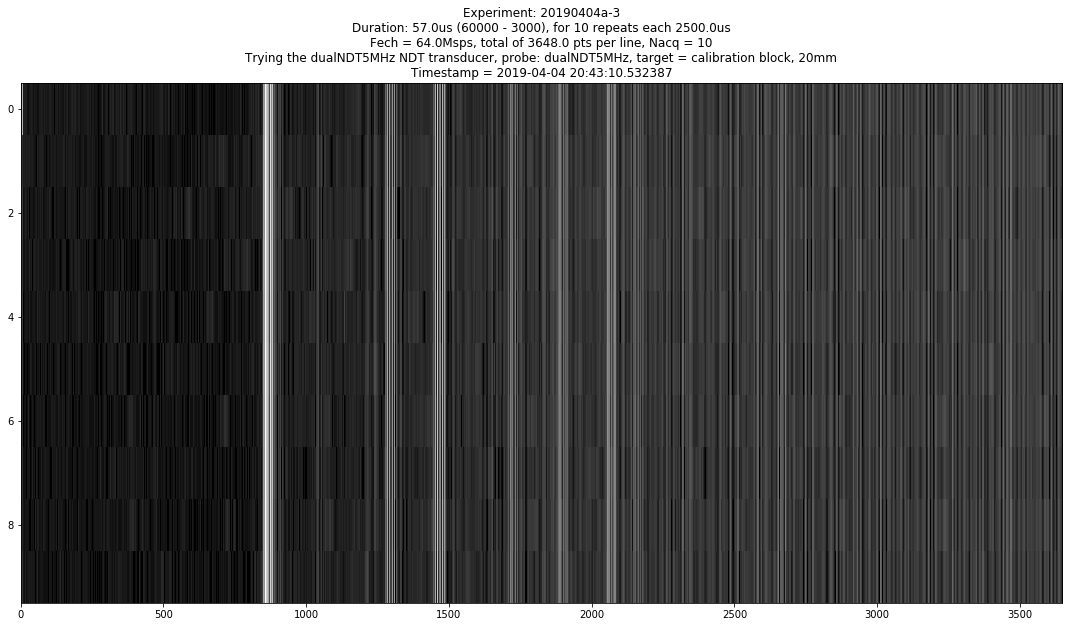

In [5]:
clean_image = z.mk2DArray()

In [6]:
print(clean_image.shape,clean_image.sum(0).shape)
avg_signal = clean_image.sum(0)/10.0
lenmax = len(clean_image[k])
T = z.t[0:lenmax]



fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT=16,17
for k in range(len(clean_image)):
    ax.scatter(T,clean_image[k],label = "Line "+str(k),marker="x")
ax.plot(T,avg_signal,label = "Average signal")

ax.set_xlim(minT,maxT)
ax.set_ylim(-1,1)

ax.legend()

DESC = z.create_title_text()+"\nDetails of Hilbert acquisition between us "+str(minT)+" and "+ str(maxT)+"."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_alllines_avg_"+str(minT)+"-"+str(maxT)+"_"+z.iD+"-"+str(z.N)+".jpg"
plt.savefig(file_name)
tag_image(file_name,"matty,dualNDT5MHz", z.experiment["id"], "hilbert,signal", DESC)

plt.show()

((10, 3648), (3648,))


NameError: name 'k' is not defined